In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from string import punctuation
import numpy as np
from scipy import stats
import pandas as pd

In [2]:
import requests
response = requests.get('https://www.gutenberg.org/files/1514/1514-0.txt')
play = response.text
play = play.split("***")[2]
play = play.replace("\n", " ")
play = play.replace("\r", " ")
import nltk
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
sent = sent_tokenize(play)
words = []
for s in sent:
    for w in word_tokenize(s):
        words.append(w.lower())
myStopWords = list(punctuation) + stopwords.words('english')

wordsNoStop = []
for i in words:
    if i.lower() not in myStopWords:
        wordsNoStop.append(i.lower())

In [4]:
import dash
import dash_cytoscape as cyto
from dash import html, dcc
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
from jupyter_dash.comms import _send_jupyter_config_comm_request

In [8]:
acts = play.split('ACT')

In [9]:
scenes = []
for act in acts:
    scenes.append(act.split('SCENE'))

In [10]:
characters = [
    'PUCK',
    'OBERON',
    'TITANIA',
    'LYSANDER',
    'DEMETRIUS',
    'HERMIA',
    'HELENA',
    'EGEUS',
    'THESEUS',
    'HIPPOLYTA',
    'NICK',
    'PETER QUINCE',
    'FRANCIS FLUTE',
    'ROBIN STARVELING',
    'TOM SNOUT',
    'SNUG',
    'PHILOSTRATE',
    'PEASEBLOSSOM',
    'COBWEB',
    'MOTE',
    'MUSTARDSEED']

In [11]:
charnum = {}

connections = {}
for i in range(len(characters)-1):
    for j in range(i+1,len(characters)):
        connections[(characters[i],characters[j])] = 0

for k in characters:
    charnum[k] = 0

for i in acts:
    for j in i.split('SCENE')[1:]:
        scenechars = []
        for k in characters:
            if j.find(k) != -1:
                scenechars.append(k)
                charnum[k] += 1
        for a in range(len(scenechars)-1):
            for b in range(a+1,len(scenechars)):
                connections[(scenechars[a],scenechars[b])] += 1

In [12]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)


In [13]:
for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)

for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v}}
        graphitems.append(dashedge)

In [5]:
_send_jupyter_config_comm_request()

In [7]:
JupyterDash.infer_jupyter_proxy_config()

In [14]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '100%', 'height': '1750px'},
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'content':'data(label)',
                    'text-halign':'center',
                    'text-valign':'center',
                    'width': 'data(size)',
                    'height': 'data(size)',
                    'font-size':4,
                    'color': 'blue',
                    'text-outline-color': 'white',
                    'text-outline-width': 0.2,
                    'shape':'circle'
                }
            },
            {
                'selector':'edge',
                'style': {
                    'width':'data(str(int(weight)/100))',
                    'line-color': 'blue',
                  }
            },
        ]
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/cindyrzheng@gmail.com/proxy/8050/


You can see in the graph that the one character, Snug is all out it's own, and as Snug is a minor character who doesn't even have a first name, it makes sense that Snug is not as interconnected in this graph. 


But one other thing in the main component that is clear is that the graph is an extremely connected graph, meaning that the character all interact with each other. since the whole play is analyzed, although there are 2 parallel storylines, the character all come together in Act 5, so that leads to the interconnectedness of all characters.

But still there are some characters who never end up meeting, most mainly the minor characters such as Snug and also to a lesser extent Philostarate as well. 

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
nxgraphitems = []

# for k,v in charnum.items():
#     dashnode = k
#     graphitems.append(dashnode)

for k,v in connections.items():
    if v != 0:
        dashedge = (k[0],k[1])
        nxgraphitems.append(dashedge)
    
nxgraphitems

[('PUCK', 'OBERON'),
 ('PUCK', 'TITANIA'),
 ('PUCK', 'LYSANDER'),
 ('PUCK', 'DEMETRIUS'),
 ('PUCK', 'HERMIA'),
 ('PUCK', 'HELENA'),
 ('PUCK', 'EGEUS'),
 ('PUCK', 'THESEUS'),
 ('PUCK', 'HIPPOLYTA'),
 ('PUCK', 'PHILOSTRATE'),
 ('PUCK', 'PEASEBLOSSOM'),
 ('PUCK', 'COBWEB'),
 ('PUCK', 'MUSTARDSEED'),
 ('OBERON', 'TITANIA'),
 ('OBERON', 'LYSANDER'),
 ('OBERON', 'DEMETRIUS'),
 ('OBERON', 'HERMIA'),
 ('OBERON', 'HELENA'),
 ('OBERON', 'EGEUS'),
 ('OBERON', 'THESEUS'),
 ('OBERON', 'HIPPOLYTA'),
 ('OBERON', 'PHILOSTRATE'),
 ('OBERON', 'PEASEBLOSSOM'),
 ('OBERON', 'COBWEB'),
 ('OBERON', 'MUSTARDSEED'),
 ('TITANIA', 'LYSANDER'),
 ('TITANIA', 'DEMETRIUS'),
 ('TITANIA', 'HERMIA'),
 ('TITANIA', 'HELENA'),
 ('TITANIA', 'EGEUS'),
 ('TITANIA', 'THESEUS'),
 ('TITANIA', 'HIPPOLYTA'),
 ('TITANIA', 'PHILOSTRATE'),
 ('TITANIA', 'PEASEBLOSSOM'),
 ('TITANIA', 'COBWEB'),
 ('TITANIA', 'MUSTARDSEED'),
 ('LYSANDER', 'DEMETRIUS'),
 ('LYSANDER', 'HERMIA'),
 ('LYSANDER', 'HELENA'),
 ('LYSANDER', 'EGEUS'),
 ('LYSANDER

In [17]:
G = nx.Graph()
G.add_edges_from(nxgraphitems)
dc = nx.degree_centrality(G)
for i in sorted(dc, key=dc.get, reverse=True):
    print('{:15s}: {:.3f}'.format(i.title(), dc[i]))

Puck           : 1.000
Oberon         : 1.000
Titania        : 1.000
Lysander       : 1.000
Demetrius      : 1.000
Theseus        : 1.000
Hippolyta      : 1.000
Hermia         : 0.923
Helena         : 0.923
Egeus          : 0.923
Peaseblossom   : 0.923
Cobweb         : 0.923
Mustardseed    : 0.923
Philostrate    : 0.538


# Most Important Nodes and Network Density
The degree centrality is quite large. This means that the graph must be very dense, which we can already see in the Dash graph above. 

We also know that the most important nodes are the ones with 1.000 degree centrality, meaning that they're essentially connected to every other character. I'd say 
that makes them the most important nodes since plays are built on character interactions, so the ones that interact with each other the most must be the most important. 

I can see that this network analysis is pretty accurate as the main characters, Puck Oberon and Titania are listed among the most important nodes. 

In [19]:
from networkx.algorithms.community.centrality import girvan_newman

In [20]:
communities = girvan_newman(G)

# Many Community graphs of different numbers of communities

[['LYSANDER', 'MUSTARDSEED', 'HERMIA', 'PEASEBLOSSOM', 'HIPPOLYTA', 'PUCK', 'COBWEB', 'OBERON', 'HELENA', 'EGEUS', 'THESEUS', 'TITANIA', 'DEMETRIUS'], ['PHILOSTRATE']]


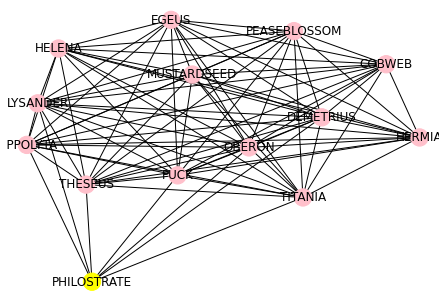

In [21]:
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
 
print(node_groups)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('pink')
    else:
        color_map.append('yellow')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

Through determining the communities using the Girvan Newman method we can see that Philostrate is in a community of their own. This is maybe because the Philostrate is more of a behind the scenes of the play we're examining, so it makes sense that they have much less connections, and then in a community of their own. 

Lets try adding some more communities! 

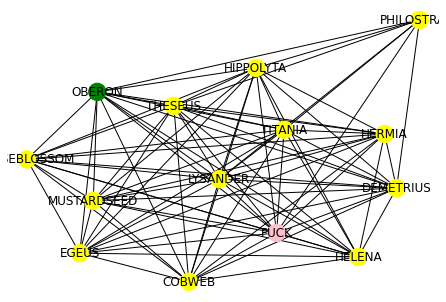

In [22]:
com = girvan_newman(G)
coms = []
for communities in list(com):
    coms.append((tuple(sorted(c) for c in communities)))
# node_groups = []
# for com in next(communities):
#     node_groups.append(list(com))
 

node_groups = []
for x in coms[2]:
    node_groups.append(x)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('pink')
    elif node in node_groups[1]:
        color_map.append('green')
    else:
        color_map.append('yellow')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

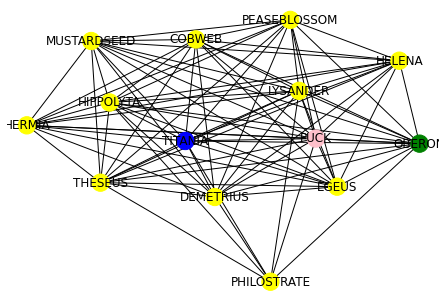

In [23]:
com = girvan_newman(G)
coms = []
for communities in list(com):
    coms.append((tuple(sorted(c) for c in communities)))
# node_groups = []
# for com in next(communities):
#     node_groups.append(list(com))
 

node_groups = []
for x in coms[3]:
    node_groups.append(x)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('pink')
    elif node in node_groups[1]:
        color_map.append('green')
    elif node in node_groups[2]:
        color_map.append('blue')
    else:
        color_map.append('yellow')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

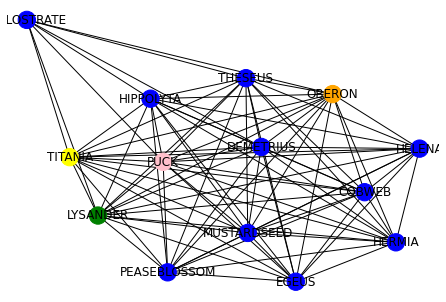

In [24]:
com = girvan_newman(G)
coms = []
for communities in list(com):
    coms.append((tuple(sorted(c) for c in communities)))
# node_groups = []
# for com in next(communities):
#     node_groups.append(list(com))
 

node_groups = []
for x in coms[4]:
    node_groups.append(x)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('pink')
    elif node in node_groups[1]:
        color_map.append('orange')
    elif node in node_groups[2]:
        color_map.append('yellow')
    elif node in node_groups[3]:
        color_map.append('green')
    else:
        color_map.append('blue')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()
#All

# All k-communities graphs determined by girvan_newman method based on edge betweeness centrality analysis

An interesting thing happens with these communities, as k increases (or the most important node changes), it flips from separating the least connected edges, and then one by one strippng off the most connected communities after. Since it peels off the most centrally different nodes first, I'm guessing that in the later k numbers, the most interconnected (and "important" character that interact with most other characters) are peeled off into their own communities first. But when k is just 1, it only separates all of the characters minus Philostrate, the least central node, into a community of "important" (ie central and connected characters". 

# Graph Color Edits
I've tailored the graph to have different colors and also have more communities that point out the most important characters, in the order of the rainbow. Puck, the most important is in pink, the least all in dark blue. This aligns with the centrality number done before, which makes sense too since the Girvan Newman relies on edge betweeness centrality, another kind of centrality by edge distance rather than degree centrality (but both are measures of centrality and roughly correlate). 